In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape # Total 50 thousand images with 32*32 pixcela dand 3 is denoting the RGB colour combination of the image 


(50000, 32, 32, 3)

In [ ]:
y_train.shape # only one dimention for the 50 thousand imaged means its just holding rh images 

(50000, 1)

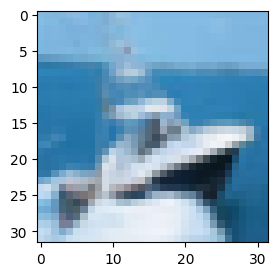

In [5]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[8])

In [6]:
def image(index):
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[index])

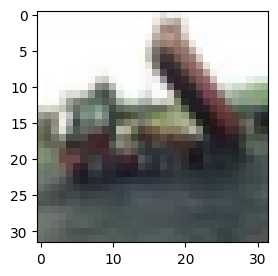

In [15]:
image(2)

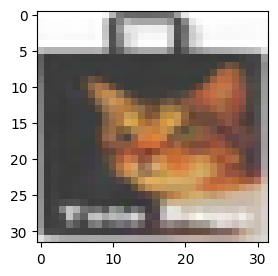

In [17]:
image(3000)

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [20]:
classes[y_train[3000][0]]

'cat'

### Data normalization 

In [8]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

# No need to scale down the y_train and y_test because its a ultimate label/image 


### Turning the y_train and y_test to categorical features 
Menas we are doing OneHotEncoder 

In [9]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
y_test_categorical = keras.utils.to_categorical(y_train,num_classes=10)

y_test_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                            keras.layers.Dense(3000,activation='relu'),
                            keras.layers.Dense(1000,activation='relu'),
                            keras.layers.Dense(10,activation='sigmoid')
                            ])

C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Compilation 

Here we have used the categorical_crossentropy as loss because our y_train_categorical is onehotencoded. 

If it was direct categorical values as it it then we will be using the parse_categorical_crossentropy


In [11]:
model.compile(optimizer='SGD',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

### Model fitting 

In [12]:
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1556/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3046 - loss: 1.9303

KeyboardInterrupt: 

In [1]:
model.predict(x_test_scaled[1])

NameError: name 'model' is not defined